# Importing code from the previous notebook

In [1]:
!git clone https://github.com/mratanusarkar/Learning-DeepLearning.git &> /dev/null
%cd /content/Learning-DeepLearning/Neural\ Networks\ -\ Zero\ to\ Hero
!python setup.py install &> /dev/null

/content/Learning-DeepLearning/Neural Networks - Zero to Hero


In [2]:
from micrograd.engine import Value
from micrograd.visualize import draw_dot

In [3]:
import random
random.seed(2023)

# Layer Class

In [4]:
# now that we have a Neuron class in hand, let's try to stack them together to form a layer
# Layers can be of the following:
# - an input layer (it doesn't consist of neurons, so we ignore)
# - hidden layers
# - output layer

Here is an illustration of neural layers (input, hidden and output layers).

As you can see, we have multiple neurons stacked together to form the layers.
Each layer takes in inputs, which are the output of the previous later's neurons
Output of the layer is nothing but the output of the neurons in the layer.

to summerise:
- Inputs: number of neurons in prev layer * number of neurons in current layer
- Outputs: number of neurons in current layer
- Layer Params: each neuron params * number of neurons in current layer

![neural_layers.jpeg](https://c.mql5.com/18/20/NN1__1.gif)

In [5]:
# as before, let us build our own version of the Neuron class with more understandable names and the expression graphs having labels
# and let us also keep what Karpathy had built in his micrograd (and ofcourse those conventions are used in torch api and other ML codebases)
# I will call my version of classes as "Noob", because "I am noob!"

In [6]:
# Karpathy's micrograd Neuron and Layer for Noobs!

class NoobNeuron:

    def __init__(self, n_inputs, label='') -> None:
        """
        Karpathy's micrograd Neuron for Noobs!
        Constructs a neuron that has `n_inputs` number of inputs and assigns random weights & bias to the neuron

        Parameters
        ----------
            n_inputs : int
                number of inputs entering into the neuron
            
            label : str
                (optional) the name or label of the Neuron
        """

        self.label = label
        self.w = [Value(random.uniform(-1,1)) for _ in range(n_inputs)]
        self.b = Value(random.uniform(-1,1))

    def __call__(self, x) -> Value:
        """
        Takes in a list of all `n_inputs` number of input `x values`, 
        Computes the body by doing `sum(w.x + b)` and 
        Passes the result through a non-linear activation function to return output

        x = [x1, x2, x3, ..., xn],
        
        and we already have w's and b who's values were randomly assigned.
        w = [w1, w2, w3, ..., wn]
        b = bias

        so, the output would be as follows:
        out = f((x1*w1 + x2*w2 + ... + xn*wn) + b),
        or `out = f(Σ(w.x) + b)`

        where, f() is the activation function (tanh in this case)

        Parameters
        ----------
            x : list(float)
                the input values or the x = [x1, x2, x3, ..., xn]

            return : Value
                returns the output value
        """

        sum = Value(0.0, label=f'{self.label} : sum')
        for i, (xi, wi) in enumerate(zip(x, self.w)):
            # inputs
            x = Value(xi, label=f'{self.label} : x{i}')

            # weights
            w = wi;         w.label=f'{self.label} : w{i}'

            # dendrites of the neuron (inputs weighted)
            den = x * w;    den.label=f'{self.label} : den{i}'

            # sum of dendrite signals inside cell body
            sum = sum + den;

        # bias of the neuron
        b = self.b;     b.label=f'{self.label} : b'

        # bias gets added inside the body
        body = sum + b;     body.label=f'{self.label} : body'

        # the net signal passes through a non-linear activation function
        out = body.tanh()
        out.label=f'{self.label} : out'

        return out

class NoobLayer:

    def __init__(self, n_neurons_prev, n_neurons_curr, label='') -> None:
        """
        Karpathy's micrograd Layer for Noobs!
        Constructs a Layer, i.e array of Neurons, that has `n_neurons_curr` number of neurons in it.
        Each of the `n_neurons_curr` number of neurons in this layer has `n_neurons_prev` number of inputs and one output each.

        So, in total, we have `n_neurons_prev * n_neurons_curr` number of neural link lines feeding into the layer
        and `n_neurons_curr` number of links going out of the layer

        Parameters
        ----------
            n_neurons_prev : int
                number of neurons in the previous layer, or number of neurons entering into this current layer
            
            n_neurons_curr : int
                number of neurons in this current layer, or number of output lines exiting this layer
            
            label : str
                (optional) the name or label of the Layer, 
                where each Neuron in the Layer will be labeled as: `{label} N:{i}`
        """
        
        self.label = label
        self.neurons = [NoobNeuron(n_neurons_prev, f'{label} N:{i}') for i in range(n_neurons_curr)]

    def __call__(self, x) -> list[Value]:
        """
        Signals from the previous layer enters into this layer,
        and the output from all the previous layer's neurons are passed into each neuron of this current layer
        the output of each of the neurons in this current layer is computed
        and the result of the same is returned in an array

        If you have n neurons in this layer, your out will be an array of n
        x = [x1, x2, x3, ..., xn]

        Parameters
        ----------
            x : list(float)
                output of all `n_neurons_prev` neurons from the prev layer, that are entering into this layer.
            
            return : list(Value)
                returns a list of output values
        """

        outs = [n(x) for n in self.neurons]
        return outs

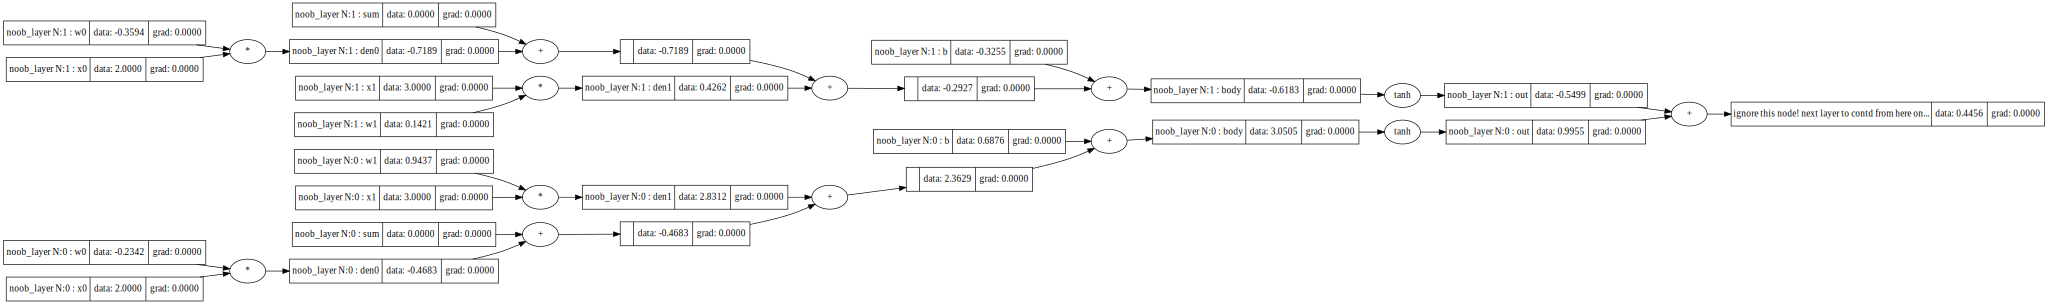

In [7]:
# let's test by building a layer with 2 neurons, having input feed in from prev layer that also had 2 neurons
x = [2.0, 3.0]
l = NoobLayer(2, 2, "noob_layer")
l = l(x)

# let's just join out from both these layers 
# for the sake of visualizing the expression graph
# (in actual nn, we will have multiple layers connected to meet the output layer, which is another layer of neurons)
output = l[0] + l[1]
output.label = 'ignore this node! next layer to contd from here on...'
draw_dot(output)

In [8]:
# isn't it beautiful and interesting? we can visualize the entire layer!!

In [9]:
# and... here goes much more efficient and optimized implementation

In [10]:
# original micrograd Neuron that is similar to PyTorch API

class Neuron:

    def __init__(self, nin) -> None:
        self.w = [Value(random.uniform(-1,1)) for _ in range(nin)]
        self.b = Value(random.uniform(-1,1))

    def __call__(self, x):
        # out = f( sum(weights.input_xs + bias) )
        body = sum((wi * xi for wi, xi in zip(self.w, x)), self.b)
        out = body.tanh()
        return out

class Layer:

    def __init__(self, nin, nout) -> None:
        self.neurons = [Neuron(nin) for _ in range(nout)]

    def __call__(self, x):
        outs = [n(x) for n in self.neurons]
        return outs

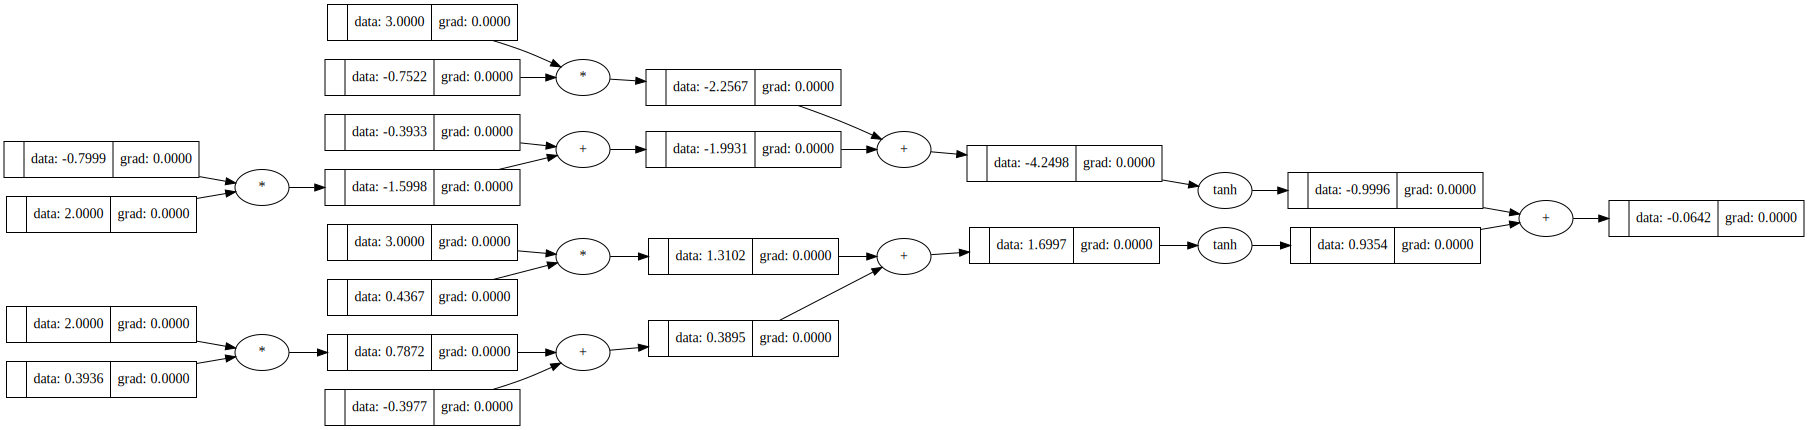

In [11]:
# let's test by building a layer with 2 neurons, having input feed in from prev layer that also had 2 neurons
x = [2.0, 3.0]
l = Layer(2, 2)
l = l(x)

# let's just join out from both these layers 
# for the sake of visualizing the expression graph
# (in actual nn, we will have multiple layers connected to meet the output layer, which is another layer of neurons)
output = l[0] + l[1]
draw_dot(output)